###First Name: - Subramanyam Mohith Bhushan Varma
###Last Name: - Jumjuru
###UH ID: - 2213217

### Importing all the necessary libraries.

In [1]:
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split, RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegressionCV,  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
## Reading the dataset into a DataFrame
df_stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [4]:
df_stroke.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
### Overall characteristics of each variable
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
### Attributes in the Dataset
df_stroke.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
# Descriptive analysis of the Data set

# Distribution of Target Variable  (Stroke) in the Dataset

#0 - No Stroke ; 1 - Stroke

df_stroke['stroke'].value_counts()


0    4861
1     249
Name: stroke, dtype: int64

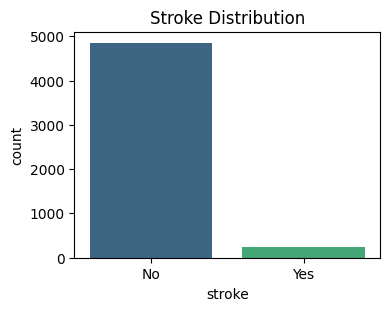

In [8]:
plt.figure(figsize=(4,3))
ax = sns.countplot(x='stroke', data=df_stroke, palette='viridis')
ax.set(xticklabels=['No', 'Yes'])
plt.tight_layout()
plt.title('Stroke Distribution')
plt.show()

## Observation: It is evident that the dataset is highly imbalanced.

### Distribution of other attributes in the Data set.

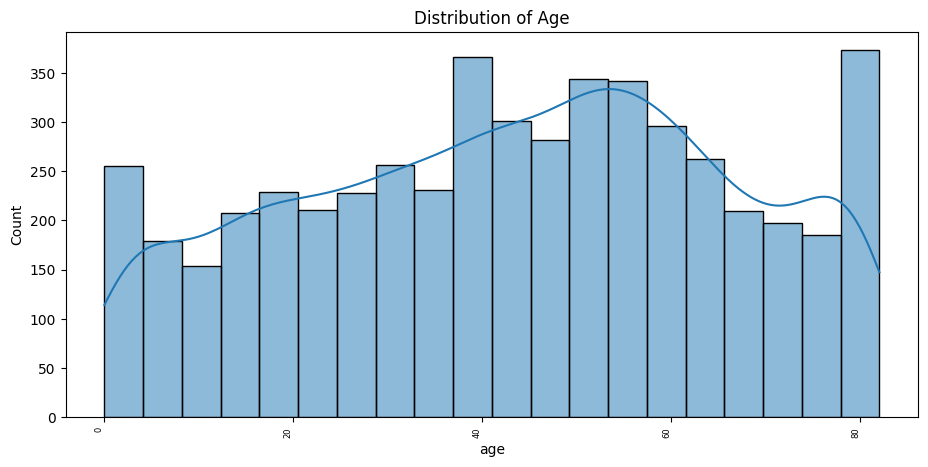

In [9]:
### Distribution of Age
plt.figure(figsize=(11,5))
ax = sns.histplot(x='age', data=df_stroke, palette='muted', kde=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=6)
plt.title('Distribution of Age')
plt.show()

In [10]:
### Distribution of Gender
gender_counts = df_stroke['gender'].value_counts() #0 - Female ; 1 - Male
gender_counts

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

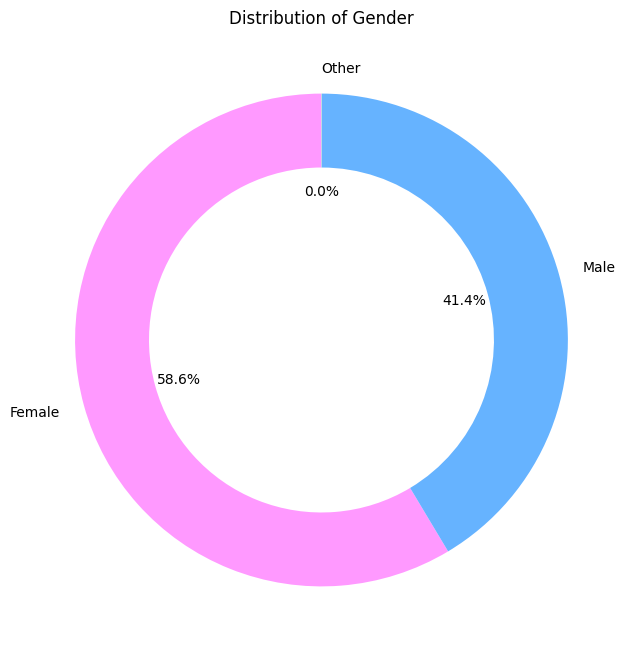

In [11]:
# Plotting a donut chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=['Female', 'Male', 'Other'], autopct='%1.1f%%', startangle=90, colors=['#ff99ff', '#66b3ff', '#99ff99'], wedgeprops=dict(width=0.3))
plt.title('Distribution of Gender')
plt.gca().add_artist(plt.Circle((0,0),0.2,fc='white'))
plt.show()

In [12]:
### Distribution of Marital status of people
df_stroke['ever_married'].value_counts() #0 - Not Married ; 1 - Married

Yes    3353
No     1757
Name: ever_married, dtype: int64

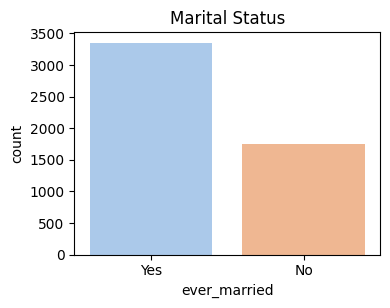

In [13]:
plt.figure(figsize=(4,3))
ax = sns.countplot(x='ever_married', data=df_stroke, palette='pastel')
plt.tight_layout()
plt.title('Marital Status')
plt.show()

In [14]:
### Distribution of Residence Type
df_stroke['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

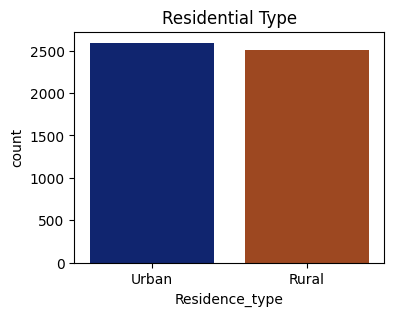

In [15]:
plt.figure(figsize=(4,3))
ax = sns.countplot(x='Residence_type', data=df_stroke, palette='dark')
plt.title('Residential Type')
plt.show()

In [16]:
### Distribution of Work Type
df_stroke['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

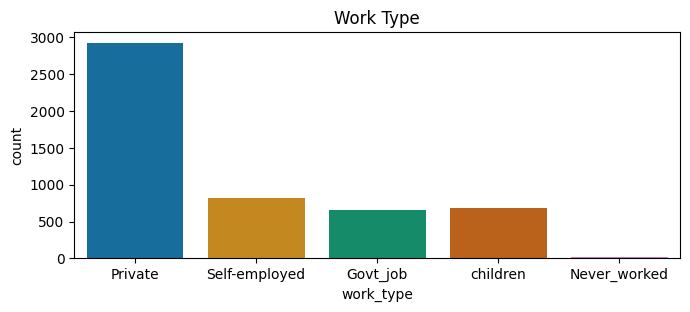

In [17]:
plt.figure(figsize=(7,3))
ax = sns.countplot(x='work_type', data=df_stroke, palette='colorblind')
plt.tight_layout()
plt.title('Work Type')
plt.show()

In [18]:
## Medical History of people in the Dataset

### Smoking Status
smoking_status_counts = df_stroke['smoking_status'].value_counts()
smoking_status_counts

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

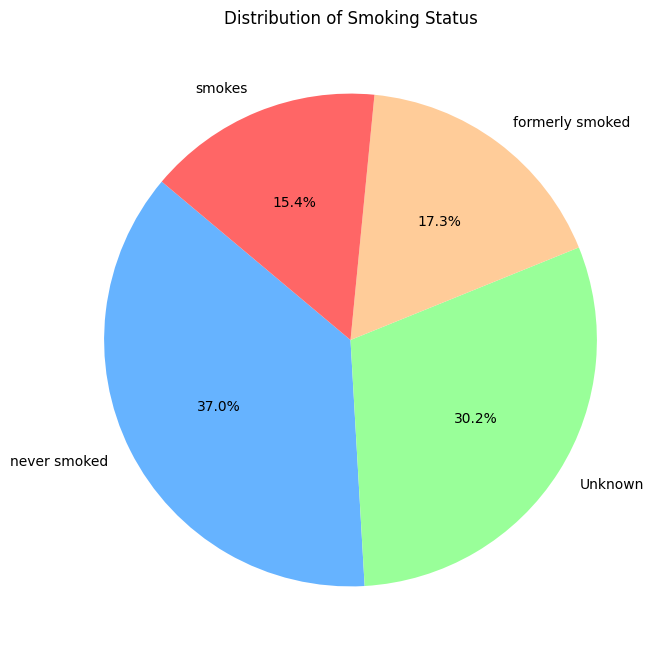

In [19]:
# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(smoking_status_counts, labels=smoking_status_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ffcc99','#ff6666'])
plt.title('Distribution of Smoking Status')
plt.show()

In [20]:
### Hypertension
df_stroke['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

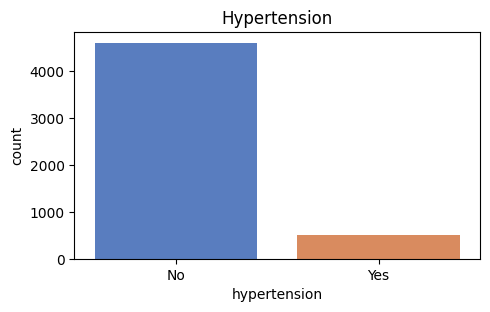

In [21]:
plt.figure(figsize=(5,3))
ax = sns.countplot(x='hypertension', data=df_stroke, palette='muted')
ax.set(xticklabels=['No', 'Yes'])
plt.tight_layout()
plt.title('Hypertension')
plt.show()

In [22]:
### Heart Disease
df_stroke['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

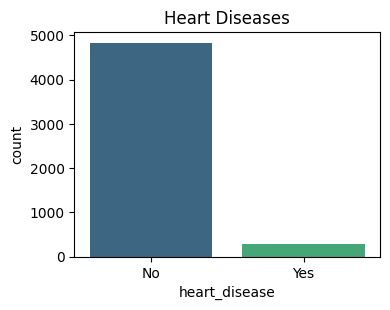

In [23]:
plt.figure(figsize=(4,3))
ax = sns.countplot(x='heart_disease', data=df_stroke, palette='viridis')
ax.set(xticklabels=['No', 'Yes'])
plt.tight_layout()
plt.title('Heart Diseases')
plt.show()

In [24]:
# Data Preprocessing

### Splitting the dataset into Input and Output sets
X_stroke = df_stroke[df_stroke.columns[1:-1]]  # input (independent features) without id attribute
y_stroke = df_stroke[df_stroke.columns[-1]]  # Target (dependent feature)

In [25]:
### Data Cleansing and Smoothing
X_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 399.3+ KB


### Note:-
#### From the descriptive analysis, we found that the dataset contains both categorical and numerical attributes. To train the model, we need to convert the categorical attributes into numerical attributes using encoding.
#### Encoding the categorical variables using one-hot encoding.

In [26]:
X_encoded = pd.get_dummies(X_stroke, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)

In [27]:
X_encoded.head(5)

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,NaN,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,0,0,1,0,0,1,0,0,0,1,0


In [28]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5110 non-null   float64
 1   hypertension                    5110 non-null   int64  
 2   heart_disease                   5110 non-null   int64  
 3   avg_glucose_level               5110 non-null   float64
 4   bmi                             4909 non-null   float64
 5   gender_Male                     5110 non-null   uint8  
 6   gender_Other                    5110 non-null   uint8  
 7   ever_married_Yes                5110 non-null   uint8  
 8   work_type_Never_worked          5110 non-null   uint8  
 9   work_type_Private               5110 non-null   uint8  
 10  work_type_Self-employed         5110 non-null   uint8  
 11  work_type_children              5110 non-null   uint8  
 12  Residence_type_Urban            51

### Splitting the Data set into Training and Testing sets

### 80% -> Training Set
### 20% -> Testing Set

In [29]:
X_train_stroke, X_test_stroke, y_train_stroke, y_test_stroke = train_test_split(
    X_encoded, y_stroke, test_size=0.2, random_state=1, stratify=y_stroke)

In [30]:
#### Looking into Train and Test sets after splitting
X_train_stroke.shape

(4088, 16)

In [31]:
X_test_stroke.shape

(1022, 16)

In [32]:
#### Checking for missing values in the split Data
X_train_stroke.isna().sum()

age                                 0
hypertension                        0
heart_disease                       0
avg_glucose_level                   0
bmi                               173
gender_Male                         0
gender_Other                        0
ever_married_Yes                    0
work_type_Never_worked              0
work_type_Private                   0
work_type_Self-employed             0
work_type_children                  0
Residence_type_Urban                0
smoking_status_formerly smoked      0
smoking_status_never smoked         0
smoking_status_smokes               0
dtype: int64

In [33]:
#### From the above description of input variable, it is found that the attribute 'bmi' has 173 missing values, which should be taken care of by replacing the missing spots accordingly.

### Replacing the missing values in 'bmi' with the mean value from the training set

# initially replacing all NaN with zero

X_train_stroke['bmi'] = X_train_stroke['bmi'].fillna(0)
X_test_stroke['bmi'] = X_test_stroke['bmi'].fillna(0)
imputer = SimpleImputer(missing_values=0, strategy='mean').fit(
    np.array(X_train_stroke['bmi']).reshape(-1, 1))
X_train_stroke['bmi'] = imputer.transform(
    np.array(X_train_stroke['bmi']).reshape(-1, 1))
X_test_stroke['bmi'] = imputer.transform(
    np.array(X_test_stroke['bmi']).reshape(-1, 1))


#### Note: To avoid data leaking in the test set, we have replaced the missing values in the test set with the same value used in the train set.

#### Checking for missing value after replacement.

In [34]:
X_train_stroke['bmi'].isna().sum()

X_test_stroke['bmi'].isna().sum()

0

#### As mentioned earlier, the distribution of the target variable in the training set is highly imbalanced, so the dataset needs to be balanced before using it for model building.

#### Target Attribute distribution before oversampling.

In [35]:
print(y_train_stroke.value_counts())

0    3889
1     199
Name: stroke, dtype: int64


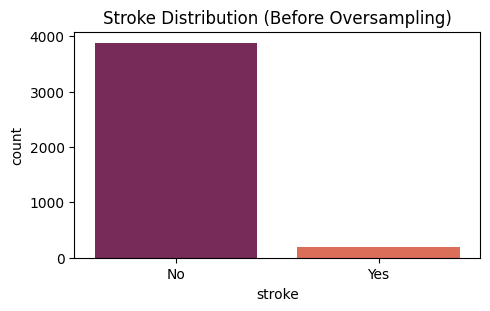

In [36]:
plt.figure(figsize=(5,3))
ax = sns.countplot(x='stroke', data=pd.DataFrame(y_train_stroke), palette='rocket')
ax.set(xticklabels=['No', 'Yes'])
plt.tight_layout()
plt.title('Stroke Distribution (Before Oversampling)')
plt.show()

In [37]:
### Balancing (Oversampling) the Training set using SMOTE
oversample = SMOTE()
X_train_stroke, y_train_stroke = oversample.fit_resample(X_train_stroke, y_train_stroke)

In [38]:
X_train_stroke.shape

(7778, 16)

In [39]:
### Distribution of target variable after Oversampling (balancing)
y_train_stroke.value_counts()


0    3889
1    3889
Name: stroke, dtype: int64

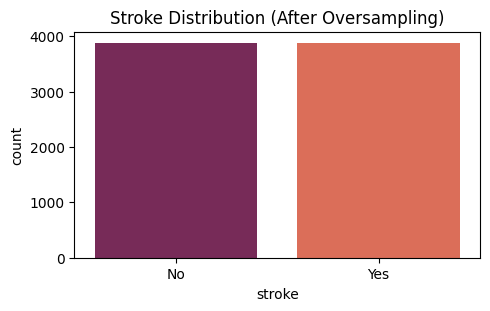

In [40]:
plt.figure(figsize=(5,3))
ax = sns.countplot(x='stroke', data=pd.DataFrame(y_train_stroke), palette='rocket')
ax.set(xticklabels=['No', 'Yes'])
plt.tight_layout()
plt.title('Stroke Distribution (After Oversampling)')
plt.show()


In [41]:
X_train_stroke.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,7778.000000,7778.000000,7778.000000,7778.000000,7778.000000,7778.000000,7778.000000,7778.000000,7778.000000,7778.000000,7778.000000,7778.000000,7778.000000,7778.000000,7778.000000,7778.000000
mean,54.974028,0.084212,0.050913,118.010474,29.337053,0.314477,0.000129,0.703137,0.002057,0.471201,0.125739,0.073798,0.383389,0.125739,0.263178,0.095654
std,22.264296,0.277723,0.219834,54.770394,6.544954,0.464337,0.011339,0.456905,0.045311,0.499202,0.331577,0.261459,0.486243,0.331577,0.440387,0.294136
min,0.080000,0.000000,0.000000,55.120000,11.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.322322,0.000000,0.000000,77.995946,25.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.559603,0.000000,0.000000,96.040622,28.802963,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,74.698250,0.000000,0.000000,144.147500,32.307632,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,82.000000,1.000000,1.000000,271.740000,92.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Feature Selection and Manipulation.

### After encoding, the number of attributes in the given data set rose to 16. As the higher dimensions of the dataset make the model more complex, we try to find any possible reduction in the dimensions in the dataset using Principal Component Analysis (PCA).

### Data Smoothing.


In [42]:
pca_stroke = PCA()
pca_stroke.fit(X_train_stroke)

PCA()

In [43]:
### Percentage of variance along each Component
per_var_stroke = np.round(pca_stroke.explained_variance_ratio_ * 100, 1)
per_var_stroke

array([85.8, 13.1,  1.1,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ])

In [44]:
np.sum(per_var_stroke[0:2])

98.89999999999999

#### Fortunately, the first two components explain almost 98.9% of the variation of our data.
#### So, we can only use PC1 and PC2 instead of all the sixteen direct attributes.
#### Percentage of variance along each Component.

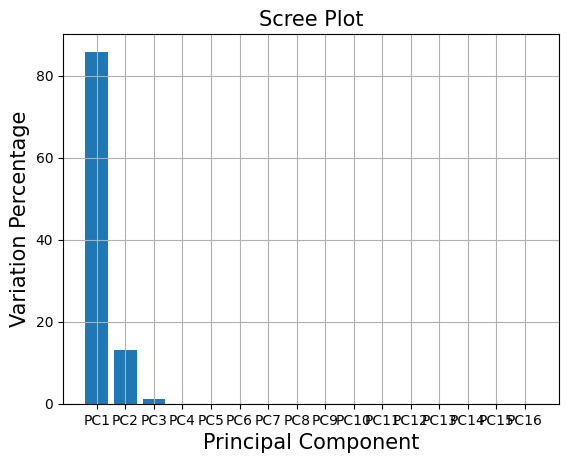

In [45]:
princ_comp_stroke = ['PC' + str(x) for x in range(1, len(X_train_stroke.columns) + 1)]
plt.bar(x=range(1, len(X_train_stroke.columns) + 1), height=per_var_stroke, tick_label=princ_comp_stroke)
plt.xlabel('Principal Component', fontsize=15)
plt.ylabel('Variation Percentage', fontsize=15)
plt.title('Scree Plot', fontsize=15)
plt.grid();

In [46]:
### Contribution of actual attributes in each Principal Component
pd.DataFrame(data=pca_stroke.components_, columns=princ_comp_stroke, index=X_train_stroke.columns)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
age,0.115599,0.000545,0.000819,0.992681,0.034867,0.000370,9.118507e-07,0.001825,-0.000015,0.000563,-0.000404,-0.000719,-0.000439,-0.000032,-0.000226,-0.000061
hypertension,-0.992359,-0.001599,-0.001062,0.116890,-0.037212,0.003681,8.897685e-06,-0.009101,0.000162,0.002101,-0.002880,0.007230,0.002774,-0.001196,0.000843,0.001146
heart_disease,-0.041174,0.003198,-0.001082,-0.030308,0.998427,-0.001586,-2.163506e-05,0.010751,-0.000059,0.013716,0.001478,-0.011933,0.000305,0.003624,0.006105,0.004114
avg_glucose_level,-0.001485,-0.002443,-0.016433,0.000705,0.016472,-0.221620,-1.384984e-04,-0.208733,0.003068,-0.882946,0.265918,0.146744,-0.128467,-0.037999,-0.103909,-0.078556
bmi,0.003107,-0.022967,0.040282,-0.000034,0.003572,0.278302,-2.342463e-04,-0.044192,0.000688,-0.129665,0.128385,0.032088,0.892518,0.129023,-0.251342,0.087684
gender_Male,0.000610,0.024256,-0.033014,0.000765,-0.003768,-0.637237,-8.977316e-05,-0.125590,0.002798,0.071842,0.001151,-0.053262,0.412592,-0.240832,0.576726,-0.087236
gender_Other,-0.000038,0.108258,0.030157,-0.000201,-0.002355,0.612659,-4.453073e-04,0.164032,0.003920,-0.189803,0.228411,-0.014682,-0.021624,-0.101080,0.686826,-0.119437
ever_married_Yes,0.010245,-0.033339,0.037787,-0.000179,0.011328,0.272877,5.703387e-05,-0.895207,0.003419,0.114346,-0.205233,0.075550,-0.040198,-0.221940,0.025088,-0.094613
work_type_Never_worked,-0.000195,0.000979,-0.011741,0.000355,-0.000580,-0.071119,1.050224e-03,-0.150061,0.001248,0.070922,0.037416,0.012901,-0.002310,0.783595,0.121371,-0.580456
work_type_Private,-0.001009,0.438746,0.092631,0.000566,-0.006727,-0.089094,6.429817e-04,-0.256205,-0.002294,0.237389,0.682918,-0.137092,-0.101334,0.173389,-0.008842,0.378623


In [47]:
### Transforming the Train and Test sets into Principle Components
pca_train_data_stroke = pca_stroke.transform(X_train_stroke)
pca_test_data_stroke = pca_stroke.transform(X_test_stroke)
pca_train_df_stroke = pd.DataFrame(pca_train_data_stroke, columns=princ_comp_stroke)
pca_test_df_stroke = pd.DataFrame(pca_test_data_stroke, columns=princ_comp_stroke)

In [48]:
### Extracting the first two components from the transformed Train and Test sets
pca_train_df_stroke = pca_train_df_stroke[pca_train_df_stroke.columns[:2]]
pca_test_df_stroke = pca_test_df_stroke[pca_test_df_stroke.columns[:2]]


In [49]:
X_train_stroke = pca_train_df_stroke
X_test_stroke = pca_test_df_stroke


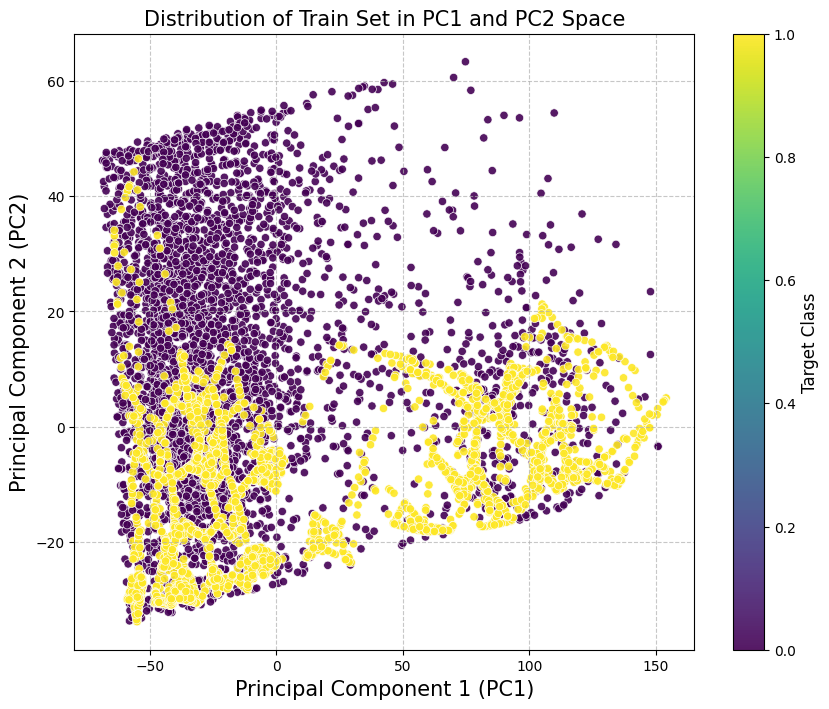

In [50]:
### Distribution of Train set with respect to PC1 and PC2

plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_train_df_stroke.PC1, pca_train_df_stroke.PC2, c=y_train_stroke, alpha=0.9,  cmap='viridis', edgecolors='w', linewidth=0.5)

plt.xlabel("Principal Component 1 (PC1)", fontsize=15)
plt.ylabel("Principal Component 2 (PC2)", fontsize=15)
plt.title("Distribution of Train Set in PC1 and PC2 Space", fontsize=15)

# Add a colorbar to show the mapping of classes to colors
cbar = plt.colorbar(scatter)
cbar.set_label('Target Class', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [51]:
## Model Building and Selection

class Model:
    first_obj, second_obj = (None, None)
    X_train, y_train, X_test, y_test = (None, None, None, None)
    X_val, y_val = (None, None)

    class First:
        X_train, y_train, X_test, y_test = (None, None, None, None)
        X_val, y_val = (None, None)
        y_pred = None

        def __init__(self, X_train, y_train, X_test, y_test, X_val, y_val):
            self.clf = Pipeline([('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
                                 ('classification', RandomForestClassifier())])
            self.X_train, self.y_train, self.X_test, self.y_test, self.X_val, self.y_val = X_train, y_train, X_test, y_test, X_val, y_val

        def fit(self):
            self.clf.fit(self.X_train, self.y_train)
            self.y_hat = self.clf.predict(self.X_val)
            self.y_pred = self.clf.predict(self.X_test)

        def pred(self, X):
            return self.clf.predict(X)

        def valuate(self):
            print(classification_report(self.y_val, self.y_hat))
            cm = confusion_matrix(self.y_val, self.y_hat)
            sns.heatmap(cm, annot=True, annot_kws={"size": 10}, xticklabels=['0', '1'], yticklabels=['0', '1'], fmt=".0f", cmap='YlGnBu')
            plt.xlabel('Predicted', fontsize=14)
            plt.ylabel('Observed', fontsize=14);

        def evaluate(self):
            print(classification_report(self.y_test, self.y_pred))
            cm = confusion_matrix(self.y_test, self.y_pred)
            sns.heatmap(cm, annot=True, annot_kws={"size": 14}, xticklabels=['0', '1'], yticklabels=['0', '1'], fmt=".0f", cmap='YlGnBu')
            plt.xlabel('Predicted', fontsize=14)
            plt.ylabel('Observed', fontsize=14);

    class Second:
        X_train, y_train, X_test, y_test = (None, None, None, None)
        X_val, y_val = (None, None)
        y_pred = None

        def __init__(self, X_train, y_train, X_test, y_test, X_val, y_val):
            self.clf = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='brute', metric='manhattan')
            self.X_train, self.y_train, self.X_test, self.y_test, self.X_val, self.y_val = X_train, y_train, X_test, y_test, X_val, y_val

        def fit(self):
            self.clf.fit(self.X_train, self.y_train)
            self.y_hat = self.clf.predict(self.X_val)
            self.y_pred = self.clf.predict(self.X_test)

        def pred(self, X):
            return self.clf.predict(X)

        def valuate(self):
            print(classification_report(self.y_val, self.y_hat))
            cm = confusion_matrix(self.y_val, self.y_hat)
            sns.heatmap(cm, annot=True, annot_kws={"size": 10}, xticklabels=['0', '1'], yticklabels=['0', '1'], fmt=".0f", cmap='YlGnBu')
            plt.xlabel('Predicted', fontsize=14)
            plt.ylabel('Observed', fontsize=14);

        def evaluate(self):
            print(classification_report(self.y_test, self.y_pred))
            cm = confusion_matrix(self.y_test, self.y_pred)
            sns.heatmap(cm, annot=True, annot_kws={"size": 14}, xticklabels=['0', '1'], yticklabels=['0', '1'], fmt=".0f", cmap='YlGnBu')
            plt.xlabel('Predicted', fontsize=14)
            plt.ylabel('Observed', fontsize=14);

    def __init__(self, X_train, y_train, X_test, y_test):
        l = math.ceil(len(y_train) * 0.2)
        self.X_val, self.y_val = X_train[l:], y_train[l:]
        self.X_train, self.y_train, self.X_test, self.y_test = X_train[:-l], y_train[:-l], X_test, y_test
        self.first_obj = self.First(self.X_train, self.y_train, self.X_test, self.y_test, self.X_val, self.y_val)
        self.second_obj = self.Second(self.X_train, self.y_train, self.X_test, self.y_test, self.X_val, self.y_val)

    def logic(self, rf, knn):
        if knn == 1 and rf == 1:
            return 1
        return 0

    def fit(self):
        self.first_obj.fit()
        self.second_obj.fit()
        self.y_hat = [self.logic(a, b) for a, b in zip(self.first_obj.y_hat, self.second_obj.y_hat)]
        self.y_pred = [self.logic(a, b) for a, b in zip(self.first_obj.y_pred, self.second_obj.y_pred)]

    def pred(self, X):
        return self.logic(self.first_obj.pred(X), self.second_obj.pred(X))

    def valuate(self):
        print(classification_report(self.y_val, self.y_hat))
        cm = confusion_matrix(self.y_val, self.y_hat)
        sns.heatmap(cm, annot=True, annot_kws={"size": 10}, xticklabels=['0', '1'], yticklabels=['0', '1'], fmt=".0f", cmap='YlGnBu')
        plt.xlabel('Predicted', fontsize=14)
        plt.ylabel('Observed', fontsize=14);

    def evaluate(self):
        print(classification_report(self.y_test, self.y_pred))
        cm = confusion_matrix(self.y_test, self.y_pred)
        sns.heatmap(cm, annot=True, annot_kws={"size": 14}, xticklabels=['0', '1'], yticklabels=['0', '1'], fmt=".0f", cmap='YlGnBu')
        plt.xlabel('Predicted', fontsize=14)
        plt.ylabel('Observed', fontsize=14);


In [52]:
### The model is an ensembled version of Two models

### Instantiating the model with Train and Test sets

obj_stroke = Model(X_train_stroke, y_train_stroke, X_test_stroke, y_test_stroke)

### Looking into individual performance of each model

#### First Model

#### First model is a Random Forest model using Linear Support Vector Classifiers as base learners. As there is a chance of overfitting, we have used 'l1 - Lasso Regression' penalty to avoid it.

#### Fitting the First Model and validating over the validation set.

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2407
           1       1.00      0.93      0.96      3815

    accuracy                           0.96      6222
   macro avg       0.95      0.97      0.96      6222
weighted avg       0.96      0.96      0.96      6222



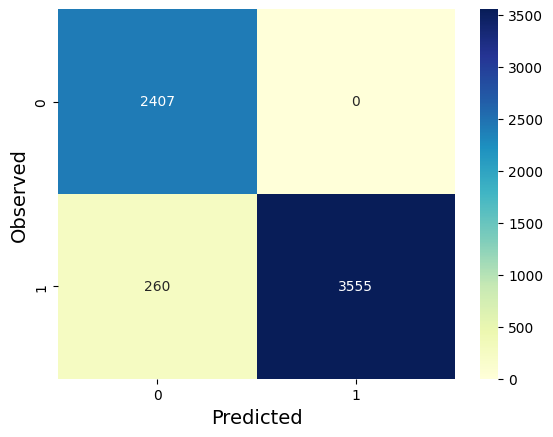

In [53]:
obj_stroke.first_obj.fit()
obj_stroke.first_obj.valuate()

### Observation:
### We found that the model performed pretty well on the validation set with an accuracy of 96%.
### Evaluating the individual performance of First Model on Test Data.

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       972
           1       0.12      0.38      0.18        50

    accuracy                           0.83      1022
   macro avg       0.54      0.62      0.55      1022
weighted avg       0.92      0.83      0.87      1022



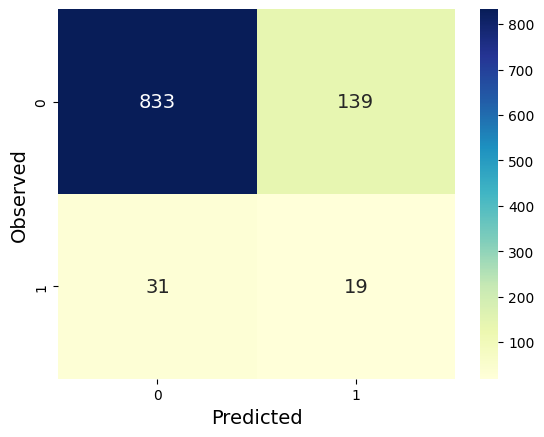

In [54]:
obj_stroke.first_obj.evaluate()

# Observation: -
#### The model is 83% accurate on the test data. However, there is a significant difference in the validation and test accuracies. So the overall accuracy of the model is not reliably good.

# Second Model: -

#### Second Model is a Knn Classifier.

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      2407
           1       0.94      0.89      0.92      3815

    accuracy                           0.90      6222
   macro avg       0.89      0.90      0.90      6222
weighted avg       0.90      0.90      0.90      6222



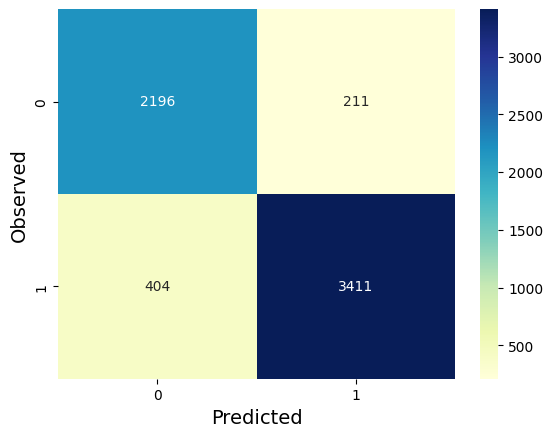

In [55]:
### Fitting the second model and validating its performance over validation set
obj_stroke.second_obj.fit()
obj_stroke.second_obj.valuate()

## Observation:-
#### Second model also performed well on the validation set with an accuracy of 90%.

              precision    recall  f1-score   support

           0       0.96      0.83      0.89       972
           1       0.11      0.40      0.17        50

    accuracy                           0.80      1022
   macro avg       0.53      0.61      0.53      1022
weighted avg       0.92      0.80      0.85      1022



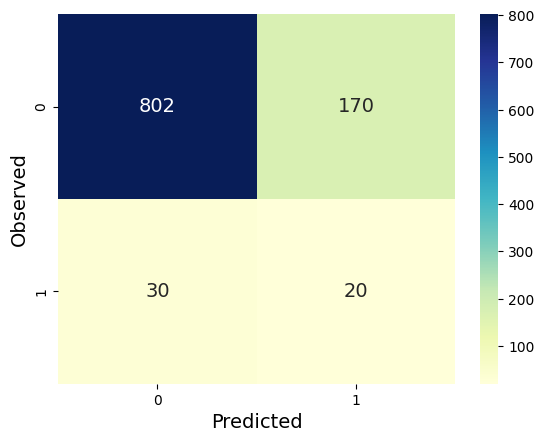

In [56]:
### Evaluating the individual performance of Second Model on Test Data
obj_stroke.second_obj.evaluate()

### Observation
#### The model is 80% accurate on the test data. However, there is a significant difference in the validation and test accuracies of the second model as well. So the overall accuracy of the model is not reliably good.

#### Evaluating the ensembled model using the First and Second Models.

In [57]:

### Fitting the model
obj_stroke.fit()


              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2407
           1       1.00      0.87      0.93      3815

    accuracy                           0.92      6222
   macro avg       0.92      0.94      0.92      6222
weighted avg       0.94      0.92      0.92      6222



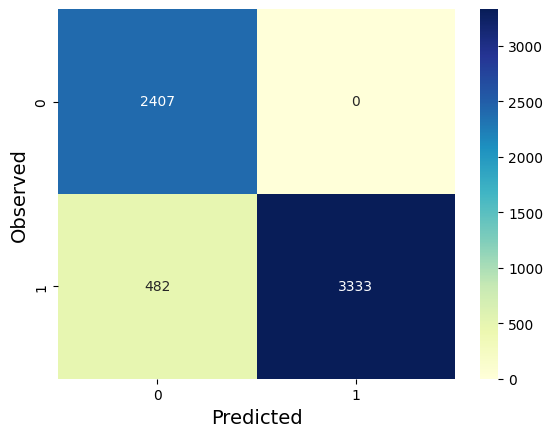

In [58]:
## Validating the model over validation set
obj_stroke.valuate()


              precision    recall  f1-score   support

           0       0.96      0.88      0.92       972
           1       0.12      0.34      0.18        50

    accuracy                           0.85      1022
   macro avg       0.54      0.61      0.55      1022
weighted avg       0.92      0.85      0.88      1022



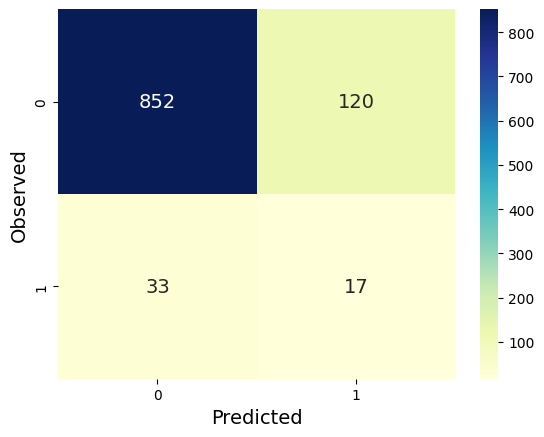

In [59]:
## Evaluating the performance of the model over Test data
obj_stroke.evaluate()

# **Observation:**

### **The ensembled model has an accuracy of 92% over the validation data and 85% over the test data. The difference is reliably less and it is evident that the ensembled model clearly outperformed both the individual models in terms of accuracy.**

# **Conclusions:**

### **1. Oversampling techniques had been applied to increase the number of instances in the minority class. Here, SMOTE (Synthetic Minority Over - sampling Technique) was used.**

### **2. Random Forest Classifier was taken into consideration, because it can handle well the imbalanced dataset due to the averaging effect of multiple trees.**

### **3. On the other hand, KNN makes prediction on majority class. In this case, the majority class heavily outweighs the minority class, the neighbours are more likely to belong to the majority class.**

### **4. On comparing KNN and Random Forest Classifier, it is observed that the Random Forests performed better than the KNN Classifier, as the testing accuracy for Random Forests is more than the KNN Classifier.**

### **5. As the Dataset is a heavily imbalanced one, the ensemble model(Random Forests - which is ensemble of decision trees) works really better and it is proved.**